Using Colab cache for faster access to the 'skin-cancer-mnist-ham10000' dataset.
Dataset downloaded at: /kaggle/input/skin-cancer-mnist-ham10000
Found 20030 files belonging to 4 classes.
Using 16024 files for training.
Found 20030 files belonging to 4 classes.
Using 4006 files for validation.
Epoch 1/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1170s 2s/step - accuracy: 0.2545 - loss: -116.4649 - val_accuracy: 0.2401 - val_loss: -1059.8112
Epoch 2/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1183s 2s/step - accuracy: 0.2547 - loss: -1617.8694 - val_accuracy: 0.2401 - val_loss: -4158.7642
Epoch 3/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1160s 2s/step - accuracy: 0.2532 - loss: -5037.0215 - val_accuracy: 0.2401 - val_loss: -9033.3926
Epoch 4/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1158s 2s/step - accuracy: 0.2538 - loss: -10085.5371 - val_accuracy: 0.2401 - val_loss: -15362.1982
Epoch 5/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1146s 2s/step - accuracy: 0.2539 - loss: -16335.5117 - val_accuracy: 0.2401 - val_loss: -22960.2168
Epoch 6/10
50

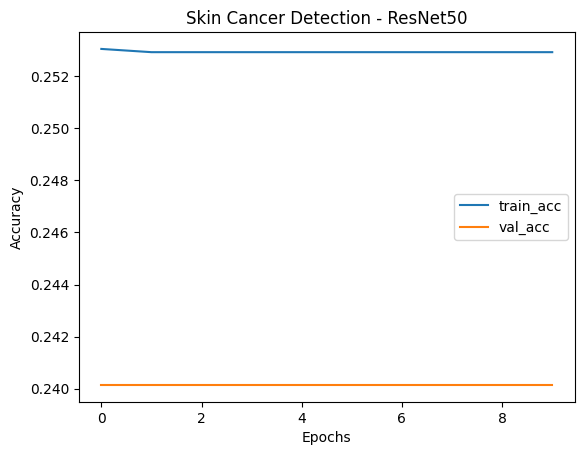

In [ ]:
# ==============================
# Week 3 - Project 1: Skin Cancer Detection
# Internship - DevelopersHub Corporation
# ==============================

# 1. Install dependencies
!pip install kagglehub tensorflow matplotlib seaborn scikit-learn

import kagglehub, os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, resnet50
import matplotlib.pyplot as plt

# 2. Download Skin Cancer Dataset (HAM10000 from ISIC)
dataset_path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
print("Dataset downloaded at:", dataset_path)

# 3. Preprocessing
img_size = (128,128)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

# Normalize and preprocess
normalization = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (resnet50.preprocess_input(normalization(x)),y))
val_ds = val_ds.map(lambda x,y: (resnet50.preprocess_input(normalization(x)),y))


# 4. Build ResNet50 Model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 5. Train
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# 6. Plot Training Results
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Skin Cancer Detection - ResNet50")
plt.show()